# Quick Start

In [1]:
from oda_api.api import DispatcherAPI
from oda_api.plot_tools import OdaImage,OdaLightCurve
from oda_api.data_products import BinaryData
import os
#%matplotlib notebook


## Connection to the dispatcher 

### build the dispatcher object

In [2]:
disp=DispatcherAPI(host='www.astro.unige.ch/cdci/astrooda/dispatch-data',instrument='mock',protocol='https')

In [3]:
instr_list=disp.get_instruments_list()
for i in instr_list:
    print (i)

isgri
jemx
polar
spi_acs


### get the description of the instrument

In [4]:
disp.get_instrument_description('isgri')


--------------
instrumet: isgri

--------------
query_name: src_query
 name: src_name,  value: test,  units: str, 
 name: RA,  value: 0.0,  units: deg, 
 name: DEC,  value: 0.0,  units: deg, 
 name: T1,  value: 2001-12-11T00:00:00.000,  units: None, 
 name: T2,  value: 2001-12-11T00:00:00.000,  units: None, 

--------------
query_name: isgri_parameters
 name: user_catalog,  value: None,  units: str, 
 name: scw_list,  value: [],  units: names_list, 
 name: radius,  value: 5.0,  units: deg, 
 name: max_pointings,  value: 50,  units: None, 
 name: osa_version,  value: None,  units: str, 
 name: E1_keV,  value: 10.0,  units: keV, 
 name: E2_keV,  value: 40.0,  units: keV, 

--------------
query_name: isgri_image_query
 product_name: isgri_image
 name: detection_threshold,  value: 0.0,  units: sigma, 
 name: image_scale_min,  value: None,  units: None, 
 name: image_scale_max,  value: None,  units: None, 

--------------
query_name: isgri_spectrum_query
 product_name: isgri_spectrum

----

### get the description of the product


In [5]:
disp.get_product_description(instrument='isgri',product_name='isgri_image')

--------------
parameters for  product isgri_image and instrument isgri

--------------
instrumet: isgri

--------------
query_name: src_query
 name: src_name,  value: test,  units: str, 
 name: RA,  value: 0.0,  units: deg, 
 name: DEC,  value: 0.0,  units: deg, 
 name: T1,  value: 2001-12-11T00:00:00.000,  units: None, 
 name: T2,  value: 2001-12-11T00:00:00.000,  units: None, 

--------------
query_name: isgri_parameters
 name: user_catalog,  value: None,  units: str, 
 name: scw_list,  value: [],  units: names_list, 
 name: radius,  value: 5.0,  units: deg, 
 name: max_pointings,  value: 50,  units: None, 
 name: osa_version,  value: None,  units: str, 
 name: E1_keV,  value: 10.0,  units: keV, 
 name: E2_keV,  value: 40.0,  units: keV, 

--------------
query_name: isgri_image_query
 product_name: isgri_image
 name: detection_threshold,  value: 0.0,  units: sigma, 
 name: image_scale_min,  value: None,  units: None, 
 name: image_scale_max,  value: None,  units: None, 


### check query before submission
we pass 'dry_run' to check if the request is correct without actually submitting it

In [6]:
data=disp.get_product(instrument='isgri',
                      product='isgri_image',
                      T1='2003-03-15T23:27:40.0',
                      T2='2003-03-16T00:03:12.0',
                      osa_version='OSA10.2',
                      RA='a',
                      DEC=-37.844167,
                      detection_threshold=5.0,
                      radius=15.,
                      product_type='Real',
                      dry_run=True)

- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
product_type isgri_image
verbose (False,)
detection_threshold 5.0
dry_run (True,)
osa_version OSA10.2
T2 2003-03-16T00:03:12.0
session_id 95UFXTZLB0JJVGM2
T1 2003-03-15T23:27:40.0
instrument isgri
api True
radius 15.0
RA a
query_type Real
off_line (False,)
DEC -37.844167
query_status ('new',)


query failed!
Remote server message:-> failed: setting form parameters
Remote server error_message-> ValueError(u"Invalid character at col 0 in angle u'a'",)
Remote server debug_message-> 


SystemExit: RemoteException (line 49): Remote analysis exception

/Users/orion/anaconda3/envs/threeML/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2886: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## Get ODA products
now we skip the dry_run to actually get the products

In [7]:
data=disp.get_product(instrument='isgri',
                      product='isgri_image',
                      T1='2003-03-15T23:27:40.0',
                      T2='2003-03-16T00:03:15.0',
                      E1_keV=20.0,
                      E2_keV=40.0,
                      osa_version='OSA10.2',
                      RA=255.986542,
                      DEC=-37.844167,
                      detection_threshold=5.0,
                      radius=15.,
                      product_type='Real')

- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
E2_keV 40.0
verbose (False,)
detection_threshold 5.0
dry_run (False,)
osa_version OSA10.2
E1_keV 20.0
T2 2003-03-16T00:03:15.0
session_id EYG8RQR5LMNLKQLZ
T1 2003-03-15T23:27:40.0
instrument isgri
api True
radius 15.0
RA 255.986542
query_type Real
product_type isgri_image
off_line (False,)
DEC -37.844167
query_status ('new',)


query done succesfully!


### the ODA data structure

In [8]:
data.show()

mosaic_image_0 0
dispatcher_catalog_1 1


you can acess memeber by name:

In [9]:
data.mosaic_image_0

or by position in the data list

In [10]:
data._p_list[0]

### the ODA catalog

In [11]:
data.dispatcher_catalog_1.table

meta_ID,src_names,significance,ra,dec,NEW_SOURCE,ISGRI_FLAG,FLAG,ERR_RAD
,,,deg,deg,,,,
int64,unicode12,float64,float64,float64,int64,int64,int64,float64
67,OAO 1657-415,18.9650936126709,255.1972198486328,-41.653160095214844,-32768,2,0,0.00014000000373926014
73,4U 1700-377,22.8853702545166,255.97720336914062,-37.83725357055664,-32768,2,0,0.0002800000074785203
76,GX 349+2,14.08207893371582,256.4292297363281,-36.415679931640625,-32768,2,0,0.0002800000074785203
128,GX 354-0,9.371565818786621,262.9886169433594,-33.828392028808594,-32768,2,0,0.0002800000074785203


you can use astropy.table commands to modify the table of the catatlog http://docs.astropy.org/en/stable/table/modify_table.html

to generate a catalog to pass to the dispatcher api

In [12]:
api_cat=data.dispatcher_catalog_1.get_api_dictionary()

In [13]:
api_cat

'{"cat_lon_name": "ra", "cat_lat_name": "dec", "cat_column_list": [[67, 73, 76, 128], ["OAO 1657-415", "4U 1700-377", "GX 349+2", "GX 354-0"], [18.9650936126709, 22.8853702545166, 14.08207893371582, 9.371565818786621], [255.1972198486328, 255.97720336914062, 256.4292297363281, 262.9886169433594], [-41.653160095214844, -37.83725357055664, -36.415679931640625, -33.828392028808594], [-32768, -32768, -32768, -32768], [2, 2, 2, 2], [0, 0, 0, 0], [0.00014000000373926014, 0.0002800000074785203, 0.0002800000074785203, 0.0002800000074785203]], "cat_column_names": ["meta_ID", "src_names", "significance", "ra", "dec", "NEW_SOURCE", "ISGRI_FLAG", "FLAG", "ERR_RAD"], "cat_coord_units": "deg", "cat_frame": "fk5", "cat_column_descr": [["meta_ID", "<i8"], ["src_names", "<U12"], ["significance", "<f8"], ["ra", "<f8"], ["dec", "<f8"], ["NEW_SOURCE", "<i8"], ["ISGRI_FLAG", "<i8"], ["FLAG", "<i8"], ["ERR_RAD", "<f8"]]}'

In [14]:
data=disp.get_product(instrument='isgri',
                      product='isgri_image',
                      T1='2003-03-15T23:27:40.0',
                      T2='2003-03-16T00:03:15.0',
                      E1_keV=20.0,
                      E2_keV=40.0,
                      osa_version='OSA10.2',
                      RA=255.986542,
                      DEC=-37.844167,
                      detection_threshold=5.0,
                      radius=15.,
                      product_type='Real',
                      selected_catalog=api_cat)

- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
selected_catalog {"cat_lon_name": "ra", "cat_lat_name": "dec", "cat_column_list": [[67, 73, 76, 128], ["OAO 1657-415", "4U 1700-377", "GX 349+2", "GX 354-0"], [18.9650936126709, 22.8853702545166, 14.08207893371582, 9.371565818786621], [255.1972198486328, 255.97720336914062, 256.4292297363281, 262.9886169433594], [-41.653160095214844, -37.83725357055664, -36.415679931640625, -33.828392028808594], [-32768, -32768, -32768, -32768], [2, 2, 2, 2], [0, 0, 0, 0], [0.00014000000373926014, 0.0002800000074785203, 0.0002800000074785203, 0.0002800000074785203]], "cat_column_names": ["meta_ID", "src_names", "significance", "ra", "dec", "NEW_SOURCE", "ISGRI_FLAG", "FLAG", "ERR_RAD"], "cat_coord_units": "deg", "cat_frame": "fk5", "cat_column_descr": [["meta_ID", "<i8"], ["src_names", "<U12"], ["significance", "<f8"], ["ra", "<f8"], ["dec", "<f8"], ["NEW_SOURCE", "<i8"], ["ISGRI_FLAG", "<i8"]

you can explore the image with the following command

In [15]:
data.mosaic_image_0.show()

------------------------------
name: mosaic_image
meta_data ['src_name', 'instrument', 'product', 'query_parameters']
number of data units 2
------------------------------
data uniti 0 ,name: Primary
data uniti 1 ,name: ISGR-MOSA-IMA


In [16]:
data.mosaic_image_0.show_meta()

------------------------------
src_name : 
instrument : isgri
product : mosaic
query_parameters : [{"query_name": "isgri_image_query"}, {"product_name": "isgri_image_query"}, {"units": "sigma", "name": "detection_threshold", "value": "5.0"}, {"units": null, "name": "image_scale_min", "value": null}, {"units": null, "name": "image_scale_max", "value": null}]
------------------------------


In [17]:
data.mosaic_image_0.data_unit[1].data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
hdu=data.mosaic_image_0.to_fits_hdu_list()

In [19]:
data.mosaic_image_0.data_unit[1].data.shape

(455, 455)

In [20]:
data.mosaic_image_0.write_fits_file('test.fits',overwrite=True)

### the ODA Image   plotting tool

In [21]:
#interactive
#%matplotlib notebook

%matplotlib inline
im=OdaImage(data.mosaic_image_0)

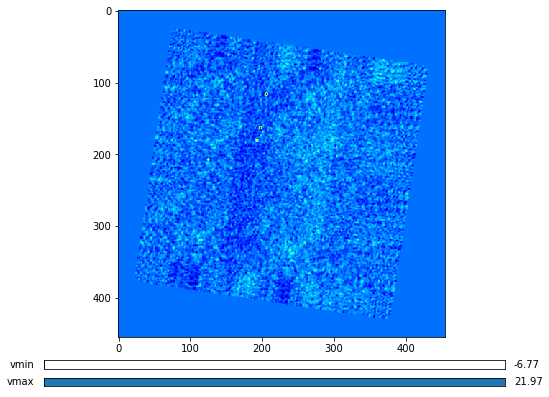

In [22]:
im.show(unit_ID=1)

In [23]:
data.mosaic_image_0.data_unit[1].header

{u'BASETYPE': u'DAL_ARRAY',
 u'BITPIX': -32,
 u'BSCALE': 1,
 u'BUNIT': u'no units',
 u'BZERO': 0,
 u'CD1_1': -0.0822862539155913,
 u'CD1_2': 0.0,
 u'CD2_1': 0.0,
 u'CD2_2': 0.0822862539155913,
 u'CHANMAX': 40,
 u'CHANMIN': 20,
 u'CHANTYPE': u'PI',
 u'CHECKSUM': u'oVP0oTP0oTP0oTP0',
 u'COMMENT': u'STAMP :',
 u'CONFIGUR': u'latest_osa_sw_2015-11-10T03:50:02',
 u'CREATOR': u'ii_skyimage 5.4.4',
 u'CRPIX1': 228.0,
 u'CRPIX2': 228.0,
 u'CRVAL1': 252.939376831055,
 u'CRVAL2': -32.649772644043,
 u'CTYPE1': u'RA---TAN',
 u'CTYPE2': u'DEC--TAN',
 u'CUNIT1': u'deg',
 u'CUNIT2': u'deg',
 u'DATASUM': u'2370916866',
 u'DATE': u'2019-09-11T09:14:22',
 u'DATE-END': u'2003-03-15T23:57:39',
 u'DATE-OBS': u'2003-03-15T23:27:53',
 u'DEADC': 0.775885283090927,
 u'DETNAM': u'ISGRI',
 u'EQUINOX': 2000.0,
 u'EXTNAME': u'ISGR-MOSA-IMA',
 u'EXTREL': u'7.4',
 u'EXTVER': 3,
 u'E_MAX': 40.0,
 u'E_MEAN': 30.0,
 u'E_MIN': 20.0,
 u'GCOUNT': 1,
 u'GRPID1': 1,
 u'HDUCLAS1': u'IMAGE',
 u'HDUCLASS': u'OGIP',
 u'HDUDOC':

### the ODA LC  plotting tool

In [24]:
data=disp.get_product(instrument='isgri',
                      product='isgri_lc',
                      T1='2003-03-15T23:27:40.0',
                      T2='2003-03-16T00:03:12.0',
                      time_bin=70,
                      osa_version='OSA10.2',
                      RA=255.986542,
                      DEC=-37.844167,
                      detection_threshold=5.0,
                      radius=15.,
                      product_type='Real')

- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
product_type isgri_lc
verbose (False,)
detection_threshold 5.0
dry_run (False,)
osa_version OSA10.2
T2 2003-03-16T00:03:12.0
time_bin 70
session_id MSO9GZKXPNS4Y9UD
T1 2003-03-15T23:27:40.0
instrument isgri
api True
radius 15.0
RA 255.986542
query_type Real
off_line (False,)
DEC -37.844167
query_status ('new',)


query done succesfully!


### explore LC

In [25]:
data.show()

isgri_lc_0 0
isgri_lc_1 1
isgri_lc_2 2
isgri_lc_3 3
isgri_lc_4 4
isgri_lc_5 5
isgri_lc_6 6
isgri_lc_7 7
isgri_lc_8 8
isgri_lc_9 9
isgri_lc_10 10
isgri_lc_11 11
isgri_lc_12 12
isgri_lc_13 13
isgri_lc_14 14
isgri_lc_15 15
isgri_lc_16 16
isgri_lc_17 17
isgri_lc_18 18
isgri_lc_19 19
isgri_lc_20 20
isgri_lc_21 21
isgri_lc_22 22
isgri_lc_23 23
isgri_lc_24 24
isgri_lc_25 25
isgri_lc_26 26
isgri_lc_27 27
isgri_lc_28 28
isgri_lc_29 29


In [26]:
data.isgri_lc_0.show_meta()

------------------------------
src_name : GX 349+2
rate : RATE
time_bin : 0.000810143479095
rate_err : ERROR
time : TIME
------------------------------


In [27]:
for ID,s in enumerate(data._p_list):
    print (ID,s.meta_data['src_name'])

(0, 'GX 349+2')
(1, 'IGR J17285-2922')
(2, 'AX J1700.2-4220')
(3, 'IGR J17507-2856')
(4, 'IGR J17508-3219')
(5, 'IGR J17586-2129')
(6, 'OAO 1657-415')
(7, 'GRO J1719-24')
(8, '4U 1735-444')
(9, 'IGR J17326-3445')
(10, '4U 1722-30')
(11, 'IGR J17099-2418')
(12, 'NEW_6')
(13, 'NEW_4')
(14, 'NEW_5')
(15, 'NEW_2')
(16, 'NEW_3')
(17, 'NEW_1')
(18, 'IGR J16248-4603')
(19, 'IGR J17091-3624')
(20, 'IGR J17191-2821')
(21, 'IGR J17103-3341')
(22, 'GRS 1747-312')
(23, 'GX 354-0')
(24, 'IGR J17314-2854')
(25, 'GX 1+4')
(26, 'H 1705-440')
(27, '1RXS J174607.8-21333')
(28, '4U 1700-377')
(29, '1E 1740.7-2942')


In [28]:
lc=data._p_list[0]
lc.data_unit[1].data

array([(1169.97924981, 198.35461, 437.45297 , 2.560371 , 16.756752 , 6.457998 , 0.9999995),
       (1169.98006   , 193.66727, 126.646324, 2.4612792, 26.851568 , 6.381221 , 0.9999995),
       (1169.98087017, 165.48798, 106.67175 , 2.2341907, 30.112095 , 5.7995043, 0.9999995),
       (1169.98168037, 170.36319, 110.04073 , 2.2748673, 24.547153 , 5.9050727, 0.9999995),
       (1169.98249057, 179.08556, 114.907425, 2.319844 , 19.534487 , 6.0552273, 0.9999995),
       (1169.98330074, 170.404  , 113.80614 , 2.2976866, 35.34908  , 5.917109 , 0.9999995),
       (1169.98411092, 177.87416, 112.59515 , 2.3153915, 46.75426  , 6.0594788, 0.9999995),
       (1169.98492112, 170.02942, 107.77012 , 2.3239565, 44.09943  , 5.904361 , 0.9999995),
       (1169.9857313 , 169.3733 , 108.96758 , 2.294586 , 38.917126 , 5.8867855, 0.9999995),
       (1169.98654149, 164.62074, 105.818214, 2.196995 , 41.819798 , 5.79285  , 0.9999995),
       (1169.98735168, 160.1174 , 100.87292 , 2.2091596, 19.254423 , 5.7093225, 

In [29]:
lc.show()

------------------------------
name: isgri_lc
meta_data ['src_name', 'rate', 'time_bin', 'rate_err', 'time']
number of data units 2
------------------------------
data uniti 0 ,name: PRIMARY
data uniti 1 ,name: ISGR-SRC.-LCR


In [30]:
lc.meta_data

{'rate': 'RATE',
 'rate_err': 'ERROR',
 'src_name': 'GX 349+2',
 'time': 'TIME',
 'time_bin': 0.000810143479094966}

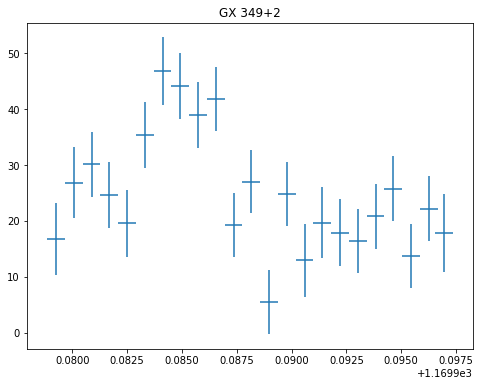

In [31]:
%matplotlib inline
OdaLightCurve(lc).show(unit_ID=1)

In [32]:
lc.data_unit[0].header

{u'BITPIX': 8,
 u'DEC': u'-37.844167',
 u'EXTEND': True,
 u'NAXIS': 0,
 u'RA': u'255.986542',
 u'SIMPLE': True,
 u'T1': u'2003-03-15T23:27:40.0',
 u'T2': u'2003-03-16T00:03:12.0',
 u'api': u'True',
 u'detection_threshold': u'5.0',
 u'dry_run': u'False',
 u'instrument': u'isgri',
 u'off_line': u'False',
 u'osa_version': u'OSA10.2',
 u'product_type': u'isgri_lc',
 u'query_status': u'new',
 u'query_type': u'Real',
 u'radius': u'15.0',
 u'session_id': u'MSO9GZKXPNS4Y9UD',
 u'time_bin': u'70',
 u'url': u'http://www.astro.unige.ch/cdci/astrooda_?product_type=isgri_lc&verbose=False&dry_run=False&osa_version=OSA10.2&T2=2003-03-16T00%3A03%3A12.0&time_bin=70&session_id=MSO9GZKXPNS4Y9UD&T1=2003-03-15T23%3A27%3A40.0&instrument=isgri&api=True&radius=15.0&detection_threshold=5.0&query_type=Real&off_line=False&DEC=-37.844167&query_status=new&RA=255.986542',
 u'verbose': u'False'}

### Polar LC

In [33]:
#conda create --name=polar_root root=5 python=3 -c nlesc
#source activate poloar_root
#conda install astropy future -c nlesc
#conda install -c conda-forge json_tricks
#from oda_api.api import DispatcherAPI
#from oda_api.data_products import BinaryData
#from oda_api.plot_tools import OdaImage,OdaLightCurve
#disp=DispatcherAPI(host='10.194.169.161',port=32784,instrument='mock',protocol='http')
data=disp.get_product(instrument='polar',product='polar_lc',T1='2016-12-18T08:32:21.000',T2='2016-12-18T08:34:01.000',time_bin=0.5,verbose=True,dry_run=False)

- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
product_type polar_lc
verbose (True,)
dry_run (False,)
query_type Real
T2 2016-12-18T08:34:01.000
time_bin 0.5
session_id W0F56C3LJM34UFPF
T1 2016-12-18T08:32:21.000
instrument polar
api True
off_line (False,)
query_status ('new',)


query done succesfully!


In [34]:
data.show()

_0 0
pord_1 1


In [35]:
data._p_list[0]

In [36]:
lc=data._p_list[0]
root=data._p_list[1]
open('lc.root', "wb").write(root)

In [37]:
 open('lc.root', "wb").write(root)

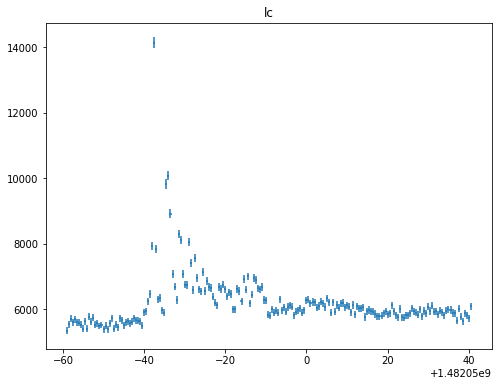

In [38]:
%matplotlib inline
OdaLightCurve(lc).show(unit_ID=1)

### SPIACS LC

In [39]:
disp.get_instrument_description('spi_acs')


--------------
instrumet: spi_acs

--------------
query_name: src_query
 name: src_name,  value: test,  units: str, 
 name: RA,  value: 0.0,  units: deg, 
 name: DEC,  value: 0.0,  units: deg, 
 name: T1,  value: 2001-12-11T00:00:00.000,  units: None, 
 name: T2,  value: 2001-12-11T00:00:00.000,  units: None, 

--------------
query_name: spiacs_parameters
 name: user_catalog,  value: None,  units: str, 
 name: [],  value: [],  units: names_list, 

--------------
query_name: spi_acs_lc_query
 product_name: spi_acs_lc
 name: time_bin,  value: 1000.0,  units: sec, 


In [40]:
data=disp.get_product(instrument='spi_acs',
                      product='spi_acs_lc',
                      T1='2003-03-15T23:27:40.0',
                      T2='2003-03-15T23:57:12.0',
                      time_bin=2,
                      osa_version='OSA10.2',
                      RA=255.986542,
                      DEC=-37.844167,
                      detection_threshold=5.0,
                      radius=15.,
                      product_type='Real')

- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
product_type spi_acs_lc
verbose (False,)
detection_threshold 5.0
dry_run (False,)
osa_version OSA10.2
T2 2003-03-15T23:57:12.0
time_bin 2
session_id 8D3RJN1Y3MXBGZ1J
T1 2003-03-15T23:27:40.0
instrument spi_acs
api True
radius 15.0
RA 255.986542
query_type Real
off_line (False,)
DEC -37.844167
query_status ('new',)


query done succesfully!


In [41]:
data.show()

_0 0


In [42]:
lc=data._p_list[0]


In [43]:
lc.show()

------------------------------
name: 
meta_data ['src_name', 'rate', 'time_bin', 'rate_err', 'time']
number of data units 2
------------------------------
data uniti 0 ,name: Primary
data uniti 1 ,name: RATE


In [44]:
lc.data_unit[1].header

{u'BITPIX': 8,
 u'DATE-END': u'2003-03-15T23:27:40.007',
 u'DATE-OBS': u'2003-03-15T23:27:40.007',
 u'EXTNAME': u'RATE',
 u'GCOUNT': 1,
 u'INSTRUME': u'SPIACS',
 u'MJDREF': 51544.0,
 u'NAXIS': 2,
 u'NAXIS1': 24,
 u'NAXIS2': 886,
 u'ONTIME': 1772.0,
 u'PCOUNT': 0,
 u'TASSIGN': u'SATELLITE',
 u'TELESCOP': u'INTEGRAL',
 u'TFIELDS': 3,
 u'TFORM1': u'D',
 u'TFORM2': u'D',
 u'TFORM3': u'D',
 u'TIMEDEL': 2.0,
 u'TIMEREF': u'LOCAL',
 u'TIMESYS': u'TT',
 u'TIMEUNIT': u's',
 u'TIMEZERO': 101086946.00000004,
 u'TSTART': 101086060.00700004,
 u'TSTOP': 101087832.00700004,
 u'TTYPE1': u'TIME',
 u'TTYPE2': u'RATE',
 u'TTYPE3': u'ERROR',
 u'XTENSION': u'BINTABLE'}

In [45]:
lc.data_unit[1].data[0:10]

array([(-885.018, 75779. , 194.65225403),
       (-883.018, 75484. , 194.27300379),
       (-881.018, 76190. , 195.17940465),
       (-879.018, 75694.5, 194.54369689),
       (-877.018, 75322. , 194.06442229),
       (-875.018, 76017.5, 194.95832888),
       (-873.018, 75529. , 194.33090336),
       (-871.018, 75815. , 194.69848484),
       (-869.018, 76324. , 195.35096621),
       (-867.018, 75448.5, 194.22731528)],
      dtype=[('TIME', '<f8'), ('RATE', '<f8'), ('ERROR', '<f8')])

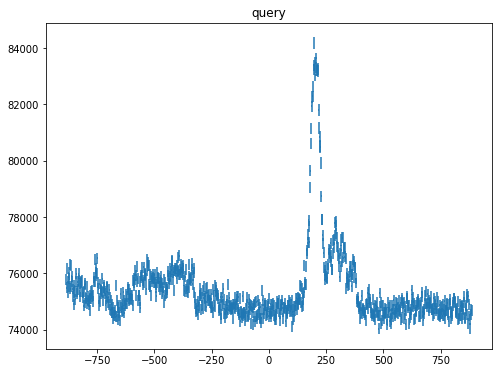

In [46]:
OdaLightCurve(lc).show(unit_ID=1)

### the ODA  and spectra

In [47]:
data=disp.get_product(instrument='isgri',
                      product='isgri_spectrum',
                      T1='2003-03-15T23:27:40.0',
                      T2='2003-03-16T00:03:12.0',
                      time_bin=50,
                      osa_version='OSA10.2',
                      RA=255.986542,
                      DEC=-37.844167,
                      detection_threshold=5.0,
                      radius=15.,
                      product_type='Real')

- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
product_type isgri_spectrum
verbose (False,)
detection_threshold 5.0
dry_run (False,)
osa_version OSA10.2
T2 2003-03-16T00:03:12.0
time_bin 50
session_id WNJJVOMHHEE8P5FY
T1 2003-03-15T23:27:40.0
instrument isgri
api True
radius 15.0
RA 255.986542
query_type Real
off_line (False,)
DEC -37.844167
query_status ('new',)
the job has been submitted on the remote server
 - the job is working remotely, please wait status=done - job_id=-1255063856769622835  35  

query done succesfully!


### explore spectra

In [48]:
for ID,s in enumerate(data._p_list):
    print (ID,s.meta_data)

(0, {'src_name': 'GX 349+2', 'product': 'isgri_spectrum'})
(1, {'src_name': 'GX 349+2', 'product': 'isgri_arf'})
(2, {'src_name': 'GX 349+2', 'product': 'isgri_rmf'})
(3, {'src_name': 'IGR J17285-2922', 'product': 'isgri_spectrum'})
(4, {'src_name': 'IGR J17285-2922', 'product': 'isgri_arf'})
(5, {'src_name': 'IGR J17285-2922', 'product': 'isgri_rmf'})
(6, {'src_name': 'AX J1700.2-4220', 'product': 'isgri_spectrum'})
(7, {'src_name': 'AX J1700.2-4220', 'product': 'isgri_arf'})
(8, {'src_name': 'AX J1700.2-4220', 'product': 'isgri_rmf'})
(9, {'src_name': 'IGR J17507-2856', 'product': 'isgri_spectrum'})
(10, {'src_name': 'IGR J17507-2856', 'product': 'isgri_arf'})
(11, {'src_name': 'IGR J17507-2856', 'product': 'isgri_rmf'})
(12, {'src_name': 'IGR J17508-3219', 'product': 'isgri_spectrum'})
(13, {'src_name': 'IGR J17508-3219', 'product': 'isgri_arf'})
(14, {'src_name': 'IGR J17508-3219', 'product': 'isgri_rmf'})
(15, {'src_name': 'IGR J17586-2129', 'product': 'isgri_spectrum'})
(16, {'sr

In [49]:
data._p_list[87].write_fits_file('spec.fits')
data._p_list[88].write_fits_file('arf.fits')
data._p_list[89].write_fits_file('rmf.fits')


In [50]:
s.show()

------------------------------
name: 
meta_data ['src_name', 'product']
number of data units 4
------------------------------
data uniti 0 ,name: PRIMARY
data uniti 1 ,name: GROUPING
data uniti 2 ,name: ISGR-RMF.-RSP
data uniti 3 ,name: ISGR-EBDS-MOD


In [51]:
d=data._p_list[3]

In [52]:
d.data_unit[1].header

{u'ANCRFILE': u'NONE',
 u'AREASCAL': 1,
 u'BACKFILE': u'NONE',
 u'BACKSCAL': 1,
 u'BASETYPE': u'DAL_TABLE',
 u'BITPIX': 8,
 u'BKGPARAM': u'rebinned_back_spe.fits',
 u'CHANTYPE': u'PI',
 u'CHECKSUM': u'nKYEqJYCnJYCnJYC',
 u'COMMENT': u'  on the next keyword which has the name CONTINUE.',
 u'CONFIGUR': u'latest_osa_sw_2015-11-10T03:50:02',
 u'CORRFILE': u'NONE',
 u'CORRSCAL': 0,
 u'CREATOR': u'ISGRISpectraSum.v5.4.2.extractall',
 u'DATASUM': u'3507849637',
 u'DATE': u'2019-09-11T12:33:43.097595',
 u'DEADC': 0.775885283090927,
 u'DEC_OBJ': -29.3624725341797,
 u'DETCHANS': 62,
 u'DETNAM': u'ISGRI',
 u'EQUINOX': 2000.0,
 u'EXPOSURE': 1198.97207125461,
 u'EXP_SRC': 417.510009765625,
 u'EXTNAME': u'ISGR-EVTS-SPE',
 u'EXTREL': u'10.4',
 u'EXTVER': 13,
 u'FILTER': u'none',
 u'FITTYPE': 6,
 u'GCOUNT': 1,
 u'GRPID1': 1,
 u'HDUCLAS1': u'SPECTRUM',
 u'HDUCLAS2': u'TOTAL',
 u'HDUCLAS3': u'RATE',
 u'HDUCLASS': u'OGIP',
 u'HDUVERS': u'1.2.1',
 u'INSTRUME': u'IBIS',
 u'ISDCLEVL': u'SPE',
 u'LONGSTRN': 

### JEM-X test

In [53]:
disp.get_instrument_description('jemx')


--------------
instrumet: jemx

--------------
query_name: src_query
 name: src_name,  value: test,  units: str, 
 name: RA,  value: 0.0,  units: deg, 
 name: DEC,  value: 0.0,  units: deg, 
 name: T1,  value: 2001-12-11T00:00:00.000,  units: None, 
 name: T2,  value: 2001-12-11T00:00:00.000,  units: None, 

--------------
query_name: jemx_parameters
 name: user_catalog,  value: None,  units: str, 
 name: scw_list,  value: [],  units: names_list, 
 name: radius,  value: 5.0,  units: deg, 
 name: max_pointings,  value: 50,  units: None, 
 name: osa_version,  value: None,  units: str, 
 name: jemx_num,  value: 2,  units: None, 
 name: E1_keV,  value: 3.0,  units: keV, 
 name: E2_keV,  value: 35.0,  units: keV, 

--------------
query_name: jemx_image_query
 product_name: jemx_image
 name: detection_threshold,  value: 0.0,  units: sigma, 
 name: image_scale_min,  value: None,  units: None, 
 name: image_scale_max,  value: None,  units: None, 

--------------
query_name: jemx_spectrum_quer

In [54]:
data=disp.get_product(instrument='jemx',
                      jemx_num='2',
                      product='jemx_image',
                      scw_list=['010200230010.001'],
                      osa_version='OSA10.2',
                      detection_threshold=5.0,
                      radius=15.,
                      product_type='dummy')

['010200230010.001']
- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
product_type jemx_image
verbose (False,)
detection_threshold 5.0
dry_run (False,)
osa_version OSA10.2
session_id FUVQ1UAACGWLMWC0
query_status ('new',)
instrument jemx
api True
radius 15.0
query_type dummy
scw_list ['010200230010.001']
off_line (False,)
jemx_num 2
the job has been submitted on the remote server
 / the job is working remotely, please wait status=done - job_id=734507049305780161  61  

query done succesfully!


In [55]:
data=disp.get_product(instrument='jemx',
                      jemx_nume='2',
                      product='jemx_lc',
                      scw_list=['010200230010.001'],
                      osa_version='OSA10.2',
                      detection_threshold=5.0,
                      radius=15.,
                      product_type='Real')

['010200230010.001']
- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
product_type jemx_lc
verbose (False,)
detection_threshold 5.0
dry_run (False,)
api True
osa_version OSA10.2
session_id S1CVMHF0DCLHCNE9
instrument jemx
jemx_nume 2
radius 15.0
query_type Real
scw_list ['010200230010.001']
off_line (False,)
query_status ('new',)
the job has been submitted on the remote server
 | the job is working remotely, please wait status=done - job_id=-73930099223456509  09  

query done succesfully!


In [56]:
data=disp.get_product(instrument='jemx',
                      jemx_num='2',
                      product='jemx_spectrum',
                      scw_list=['010200230010.001'],
                      osa_version='OSA10.2',
                      detection_threshold=5.0,
                      radius=15.,
                      product_type='Real')

['010200230010.001']
- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
product_type jemx_spectrum
verbose (False,)
detection_threshold 5.0
dry_run (False,)
osa_version OSA10.2
session_id R6OWJ426B0MB0CAR
query_status ('new',)
instrument jemx
api True
radius 15.0
query_type Real
scw_list ['010200230010.001']
off_line (False,)
jemx_num 2
the job has been submitted on the remote server
 \ the job is working remotely, please wait status=done - job_id=-8193837570595478341  41  

query done succesfully!


In [57]:
from threeML.plugins.OGIPLike import  OGIPLike
from threeML.io.package_data import get_path_of_data_file
from threeML import *
warnings.filterwarnings('ignore')
%matplotlib inline


WARNING UserWarning: Using default configuration from /Users/orion/anaconda3/envs/threeML/lib/python2.7/site-packages/threeML-0.4.1199-py2.7.egg/threeML/data/threeML_config.yml. You might want to copy it to /Users/orion/.threeML/threeML_config.yml to customize it and avoid this warning.


WARNING RuntimeWarning: Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML


WARNING RuntimeWarning: Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML


WARNING RuntimeWarning: Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML



In [58]:
ogip_data = OGIPLike('ogip',
                     observation='spec_test.fits',
                     arf_file= 'arf_test.fits' ,
                     response= 'rmf_test.fits')

Auto-probed noise models:
- observation: gaussian
- background: None


In [59]:
ogip_data.set_active_measurements('20-60')


Range 20-60 translates to channels 7-24
Now using 18 channels out of 62


bad channels shown in red hatching



(1e-05, 10)

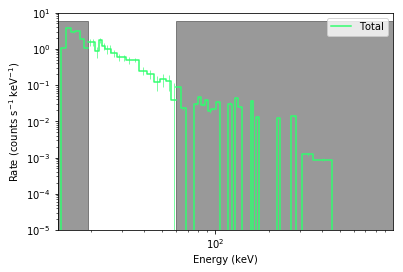

In [60]:
ogip_data.view_count_spectrum()
plt.ylim(1E-5,10)


In [61]:
fit_function = Cutoff_powerlaw()

# define the point source
point_source = PointSource('ps', 0, 0, spectral_shape=fit_function)

#define the model
model = Model(point_source)

# create a data list
datalist = DataList(ogip_data)

# make the joint likelihood
jl = JointLikelihood(model, datalist)

#fit
jl.fit();

Best fit values:



,result,unit
parameter,,
ps.spectrum.main.Cutoff_powerlaw.K,(2.3 -1.1 +2.0) x 10^-3,1 / (cm2 keV s)
ps.spectrum.main.Cutoff_powerlaw.index,(5.3 +/- 2.5) x 10^-1,
ps.spectrum.main.Cutoff_powerlaw.xc,9.8 -1.0 +1.1,keV



Correlation matrix:



1.00,-0.93,0.49
-0.93,1.00,-0.76
0.49,-0.76,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
ogip,5.24134
total,5.24134



Values of statistical measures:



,statistical measures
AIC,18.196966
BIC,19.153796


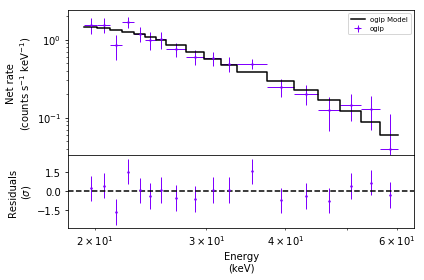

In [62]:
display_spectrum_model_counts(jl, step=True);


A Jupyter Widget

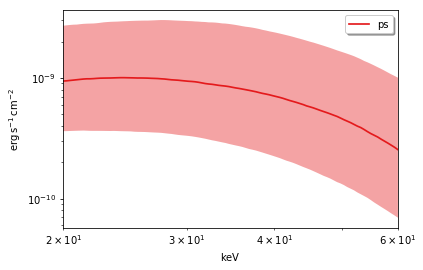

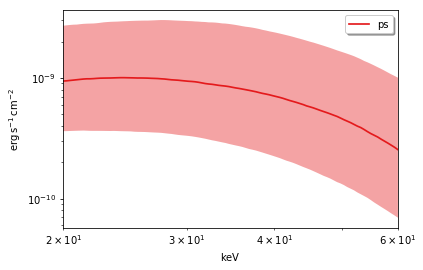

In [63]:
plot_point_source_spectra(jl.results, ene_min=20, ene_max=60, num_ene=100,
                          flux_unit='erg / (cm2 s)')

In [64]:

# A uniform prior can be defined directly, like:
model.ps.spectrum.main.Cutoff_powerlaw.index.prior = Uniform_prior(lower_bound=-2.,
                                                                     upper_bound=2.)

# or it can be set using the currently defined boundaries
model.ps.spectrum.main.Cutoff_powerlaw.xc.prior=  Uniform_prior(lower_bound=0,
                                                                     upper_bound=100)


# The same for the Log_uniform prior
model.ps.spectrum.main.Cutoff_powerlaw.K.prior = Log_uniform_prior(lower_bound=1e-3,
                                                                     upper_bound=100)


model.display()

Model summary:
==============

                  N
Point sources     1
Extended sources  0
Particle sources  0

Free parameters (3):
--------------------

                                             value min_value max_value  \
ps.spectrum.main.Cutoff_powerlaw.K      0.00230365     1e-30      1000   
ps.spectrum.main.Cutoff_powerlaw.index    0.531183       -10        10   
ps.spectrum.main.Cutoff_powerlaw.xc         9.7834      None      None   

                                                  unit  
ps.spectrum.main.Cutoff_powerlaw.K      keV-1 s-1 cm-2  
ps.spectrum.main.Cutoff_powerlaw.index                  
ps.spectrum.main.Cutoff_powerlaw.xc                keV  

Fixed parameters (4):
(abridged. Use complete=True to see all fixed parameters)


Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

In [65]:
bs = BayesianAnalysis(model, datalist)

# This uses the emcee sampler
samples = bs.sample(n_walkers=30, burn_in=100, n_samples=1000)

A Jupyter Widget

A Jupyter Widget


Mean acceptance fraction: 0.3600333333333335

Maximum a posteriori probability (MAP) point:



,result,unit
parameter,,
ps.spectrum.main.Cutoff_powerlaw.K,(9 +/- 7) x 10^-3,1 / (cm2 keV s)
ps.spectrum.main.Cutoff_powerlaw.index,(2 +/- 4) x 10^-1,
ps.spectrum.main.Cutoff_powerlaw.xc,(1.14 -0.22 +0.20) x 10,keV



Values of -log(posterior) at the minimum:



,-log(posterior)
ogip,-2.285314
total,-2.285314



Values of statistical measures:



,statistical measures
AIC,12.284915
BIC,13.241744
DIC,-150.183183
PDIC,-158.302790


In [66]:
bs.results.display()

Maximum a posteriori probability (MAP) point:



,result,unit
parameter,,
ps.spectrum.main.Cutoff_powerlaw.K,(9 +/- 7) x 10^-3,1 / (cm2 keV s)
ps.spectrum.main.Cutoff_powerlaw.index,(2 +/- 4) x 10^-1,
ps.spectrum.main.Cutoff_powerlaw.xc,(1.14 -0.22 +0.20) x 10,keV



Values of -log(posterior) at the minimum:



,-log(posterior)
ogip,-2.285314
total,-2.285314



Values of statistical measures:



,statistical measures
AIC,12.284915
BIC,13.241744
DIC,-150.183183
PDIC,-158.302790


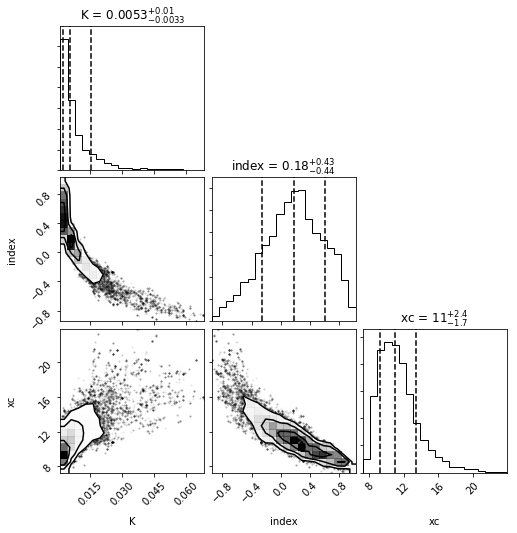

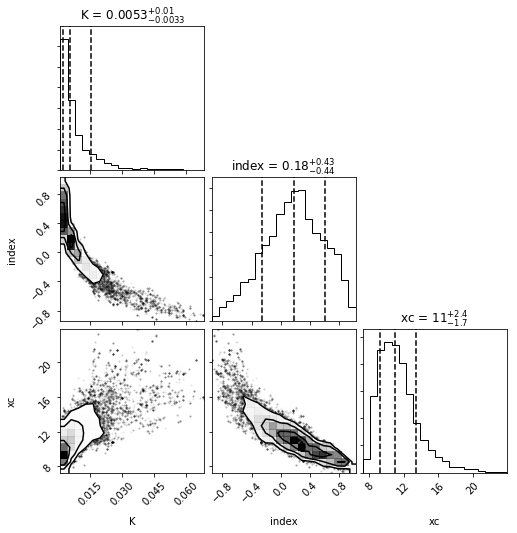

In [67]:
bs.results.corner_plot()

A Jupyter Widget

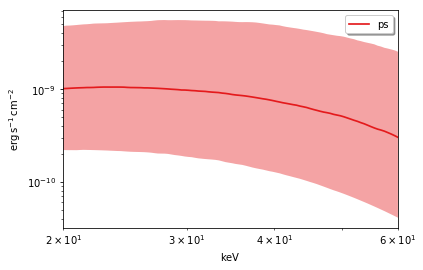

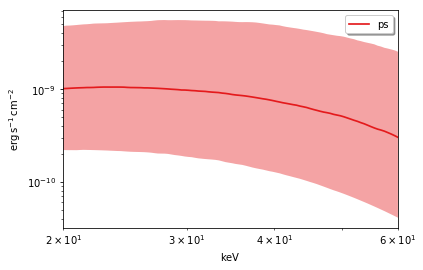

In [68]:
plot_point_source_spectra(bs.results, ene_min=20, ene_max=60, num_ene=100,
                          flux_unit='erg / (cm2 s)')

In [69]:

fluxes_bs = bs.results.get_point_source_flux(100 * u.keV, 1 * u.MeV)

A Jupyter Widget

,flux
ps: total,(0.25 -0.23 +5) x 10^-11 erg / (cm2 s)
